***
## **COURSEWORK - Statistical and analytical methods of Big Data**
### AUTHOR: Krzysztof Pietruczuk
### January 24, 2023
***


#### GOAL OF THE PROJECT: Analysis of stroke data contained in the file `healthcare-dataset-stroke-data.csv`.

----------------------------

In [1]:
import pandas as pd                                                                  # loading the needed libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
stroke_data = pd.read_csv("healthcare-dataset-stroke-data.csv", sep = ',')           # Loading data from a .csv file

> #### **INITIAL ANALYSIS OF THE DATASET**

In [3]:
stroke_data.head()                                                                   # Dataframe header and first 5 records

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
stroke_data.shape                                                                    # The number of rows and columns in the data frame

(5110, 12)

In [5]:
stroke_data.info()                                                                   # Information about the stroke_data object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
stroke_data.isnull().sum()                                                           # List in which columns there are missing values and what is their number

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
stroke_data['gender'].value_counts()                                                 # Unique values in the gender column and their quantity

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [8]:
stroke_data['hypertension'].value_counts()                                           # Unique values in the hypertension column and their number

0    4612
1     498
Name: hypertension, dtype: int64

In [9]:
stroke_data['heart_disease'].value_counts()                                          # Unique values in the heart_disease column and their number

0    4834
1     276
Name: heart_disease, dtype: int64

In [10]:
stroke_data['ever_married'].value_counts()                                           # Unique values in the ever_married column and their number

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [11]:
stroke_data['work_type'].value_counts()                                              # Unique values in the work_type column and their number

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [12]:
stroke_data['Residence_type'].value_counts()                                         # Unique values in the Residence_type column and their number

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [13]:
stroke_data['smoking_status'].value_counts()                                         # Unique values in the smoking_status column and their number

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [14]:
stroke_data['stroke'].value_counts()                                                 # Unique values in the stroke column and their number

0    4861
1     249
Name: stroke, dtype: int64

In [15]:
stroke_data[['age','avg_glucose_level', 'bmi']].describe().T                         # Basic descriptive statistics, only data were taken into account
                                                                                     # having type float64 which are numeric data

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60



<u>**INFORMATION OBTAINED AT THIS STAGE:**</u><br>
The data frame consists of 12 columns and 5110 rows.
Three columns are float64, four are int64, and five are object.
There are 249 people with a stroke in the database, 4861 people without a stroke.
The gender column contains only one value entered as 'other'.
In the bmi column we have missing values (NaN) - 201 data are missing.<br>
<u>**CONCLUSIONS:**</u>
1. We delete the record with the value entered as 'other'.
2. We replace the values (NaN) in the bmi column with the mean value (mean=28.89).
3. The minimum and maximum value in the bmi column should also be set, taking into account the information about this indicator - optimally: min 14, max 55.
4. Calculation of BMI indicators for given patients proves that we are dealing with the parameters of adults, so the minimum age can be set to 18.
---------------
<u>CONCERNING BMI:</u> The BMI indicator should not be used in children and adolescents, because the content of adipose tissue changes during intensive development. It is assumed that the calculated indicator gives a correct result for people over 18 years of age. To assess the correct development of the child, percentile charts are used. The correct BMI should be 18.5-24.9. Below 16 we talk about the state of starvation and above 40 about extreme obesity (III degree obesity).<br>
<u>CONCERNING AGE:</u> The age range has been set to adults 18 years and older, due to both the use of BMI and the fact that the incidence of stroke in children is very low. The incidence of stroke in children is estimated at 3/100,000 and in adults at 150/100,000 (literature data).
---------------

In [16]:
stroke_data.drop(stroke_data.loc[stroke_data['gender']=='Other'].index, inplace=True)        # Removal of a row that had the value 'other' in the gender column

In [17]:
stroke_data['bmi'] = stroke_data['bmi'] .fillna(28.89)                                       # Inserting the n bmi mean value in place of the missing data in this column

In [18]:
stroke_data.drop(stroke_data.loc[stroke_data['age'] < 18].index, inplace=True)               # Deletion of records for persons under 18 years of age

In [19]:
stroke_data.drop(stroke_data.loc[stroke_data['bmi'] < 14].index, inplace=True)               # Set min=14 for bmi column

In [20]:
stroke_data.drop(stroke_data.loc[stroke_data['bmi'] > 55].index, inplace=True)               # Set max value=60 for bmi column

In [21]:
stroke_data.shape[0]                                                                         # Check how many records are left

4220

In [22]:
stroke_data[['age','avg_glucose_level', 'bmi']].describe().applymap('{:,.2f}'.format).T      # Basic stats

,count,mean,std,min,25%,50%,75%,max
age,"4,220.00",50.25,17.85,18.00,36.00,51.00,64.00,82.00
avg_glucose_level,"4,220.00",108.45,47.70,55.12,77.49,92.47,116.03,271.74
bmi,"4,220.00",30.15,6.57,14.10,25.60,28.89,33.70,55.00


Graphical representation of numerical data in the form of histograms with a marked density line.

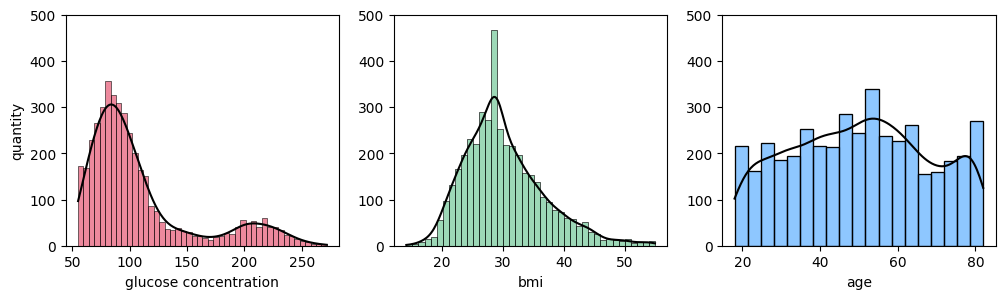

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,3))                                    # Histograms from the frequencies of individual column values with a marked density line

sns.histplot(stroke_data['avg_glucose_level'], kde=True, ax=ax1, color='#DC143C')           # The avg_glucose_level column
sns.histplot(stroke_data['bmi'], kde=True, ax=ax2, color='#3CB371')                         # bmi column
sns.histplot(stroke_data['age'], kde=True, ax=ax3, color='#1E90FF')                         # age column

ax1.lines[0].set_color('black')                                                             # Density line color setting
ax2.lines[0].set_color('black')
ax3.lines[0].set_color('black')

ax1.set_ylabel('quantity')                                                                     # Set x and y axis labels for individual graphs
ax1.set_xlabel('glucose concentration')
ax2.set_ylabel('')
ax2.set_xlabel('bmi')
ax3.set_ylabel('')
ax3.set_xlabel('age')

ax1.set_yticks([0,100,200,300,400,500])                                                     # Setting the y-axis scale for individual graphs
ax2.set_yticks([0,100,200,300,400,500])
ax3.set_yticks([0,100,200,300,400,500])

plt.show()                                                                                  # Bulk display of histograms

Graphical presentation of outliers.

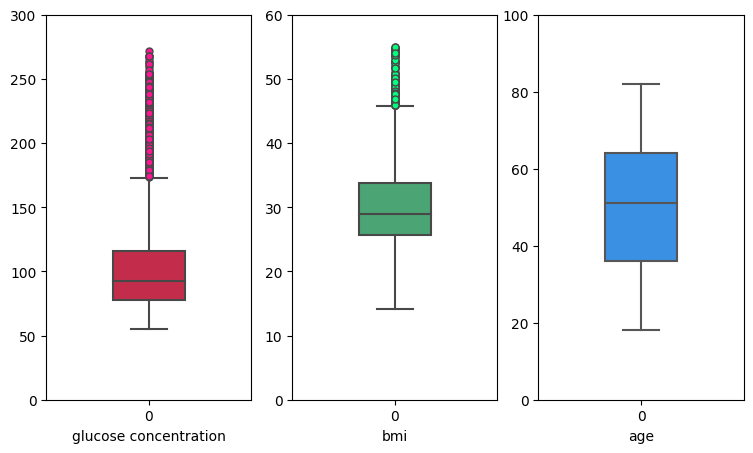

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(9,5))                                    # Boxplots and outliers
color1_circle = dict(markerfacecolor='#FF1493', marker='o')
color2_circle = dict(markerfacecolor='#00FF7F', marker='o')
color3_circle = dict(markerfacecolor='#00FF7F', marker='o')
sns.boxplot(stroke_data['avg_glucose_level'], flierprops=color1_circle, color='#DC143C', ax=ax1, width=0.35)  
sns.boxplot(stroke_data['bmi'], flierprops=color2_circle, color='#3CB371', ax=ax2, width=0.35)
sns.boxplot(stroke_data['age'], flierprops=color3_circle, color='#1E90FF', ax=ax3, width=0.35)

ax1.set_xlabel('glucose concentration')                                                    # Set x-axis labels for individual charts
ax2.set_xlabel('bmi')
ax3.set_xlabel('age')

ax1.set_yticks([0,50,100,150,200,250,300])                                                 # Setting the y-axis scale for individual graphs
ax2.set_yticks([0,10,20,30,40,50,60])
ax3.set_yticks([0,20,40,60,80,100])


plt.show()                                                                                 # Bulk display of boxplots

Identification of outliers in avg_glucose_level, bmi columns.


In [25]:
stroke_data[['avg_glucose_level','bmi']].quantile(np.arange(0.0, 1.1, 0.1)).applymap('{:,.2f}'.format).T       # Percentile data

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
avg_glucose_level,55.12,66.01,74.06,80.40,86.02,92.47,99.76,109.68,129.33,199.89,271.74
bmi,14.10,22.60,24.70,26.50,28.00,28.89,30.50,32.50,35.10,39.20,55.00


In [26]:
upper_limit = stroke_data.avg_glucose_level.quantile(.99)               # Determining outliers using percentiles. As lower
lower_limit = stroke_data.avg_glucose_level.quantile(.01)               # the lower bound was designated the 1st percentile as the upper 99th percentile.

print('outliers', '---<', "{:.2f}".format(lower_limit), '---data set---', "{:.2f}".format(upper_limit), '>---', 'outliers')

outliers ---< 56.47 ---data set--- 243.52 >--- outliers


In [27]:
upper_limit = stroke_data.bmi.quantile(.99)                             # Determining outliers using percentiles. As lower
lower_limit = stroke_data.bmi.quantile(.01)                             # the lower bound was designated the 1st percentile as the upper 99th percentile.

print('outliers', '---<', "{:.2f}".format(lower_limit), '---data set---', "{:.2f}".format(upper_limit), '>---', 'outliers')

outliers ---< 18.70 ---data set--- 50.20 >--- outliers


In [28]:
(stroke_data['bmi'] > 50.20).value_counts()                             # Checking how many records there are with a bmi value above 50.20

False    4180
True       40
Name: bmi, dtype: int64

I remove bmi values over 50.20 as outliers

In [29]:
stroke_data.drop(stroke_data.loc[stroke_data['bmi'] > 50.20].index, inplace=True)            # Deletion of rows with bmi values > 50.20

In [30]:
stroke_data[['age','avg_glucose_level', 'bmi']].describe().applymap('{:,.2f}'.format).T      # Basic stats

,count,mean,std,min,25%,50%,75%,max
age,"4,180.00",50.27,17.89,18.00,36.00,51.00,64.00,82.00
avg_glucose_level,"4,180.00",108.28,47.51,55.12,77.49,92.42,115.98,271.74
bmi,"4,180.00",29.94,6.21,14.10,25.50,28.89,33.50,50.20


In [31]:
stroke_data.drop(columns=['id'], inplace=True)                                               # Remove the id column

Encoding values in selected columns

| column             |   | value               | code |          
|--------------------|---|---------------------|:----:|      
| gender             |   | Male                | 0    |    
|                    |   | Female              | 1    | 
|                    |   |                     |      |
| ever_married       |   | No                  | 0    |
|                    |   | Yes                 | 1    |  
|                    |   |                     |      |
| work_type          |   | Private             | 0    |
|                    |   | Self-employed       | 1    |
|                    |   | Govt_job            | 2    |
|                    |   | Never_worked        | 3    |
|                    |   |                     |      |
| Residence_type     |   | Urban               | 0    |
|                    |   | Rural               | 1    |
|                    |   |                     |      |
| smoking_status     |   | never smoked        | 0    |
|                    |   | formerly smoked     | 1    |
|                    |   | smokes              | 2    |
|                    |   | Unknown             | 3    |

In [32]:
stroke_data.loc[ stroke_data['gender'] == 'Male', 'gender'] = 0                             # Encoding specific values in selected columns
stroke_data.loc[ stroke_data['gender'] == 'Female', 'gender'] = 1
stroke_data.loc[ stroke_data['ever_married'] == 'No', 'ever_married'] = 0
stroke_data.loc[ stroke_data['ever_married'] == 'Yes', 'ever_married'] = 1
stroke_data.loc[ stroke_data['work_type'] == 'Private', 'work_type'] = 0
stroke_data.loc[ stroke_data['work_type'] == 'Self-employed', 'work_type'] = 1
stroke_data.loc[ stroke_data['work_type'] == 'Govt_job', 'work_type'] = 2
stroke_data.loc[ stroke_data['work_type'] == 'Never_worked', 'work_type'] = 3
stroke_data.loc[ stroke_data['Residence_type'] == 'Urban', 'Residence_type'] = 0
stroke_data.loc[ stroke_data['Residence_type'] == 'Rural', 'Residence_type'] = 1
stroke_data.loc[ stroke_data['smoking_status'] == 'never smoked', 'smoking_status'] = 0
stroke_data.loc[ stroke_data['smoking_status'] == 'formerly smoked', 'smoking_status'] = 1
stroke_data.loc[ stroke_data['smoking_status'] == 'smokes', 'smoking_status'] = 2
stroke_data.loc[ stroke_data['smoking_status'] == 'Unknown', 'smoking_status'] = 3

stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,0,228.69,36.60,1,1
1,1,61.0,0,0,1,1,1,202.21,28.89,0,1
2,0,80.0,0,1,1,0,1,105.92,32.50,0,1
3,1,49.0,0,0,1,0,0,171.23,34.40,2,1
4,1,79.0,1,0,1,1,1,174.12,24.00,0,1


In [33]:
stroke_data.gender = stroke_data.gender.astype(pd.Int64Dtype())                              # Changing the data type
stroke_data.age = stroke_data.age.astype(pd.Int64Dtype())
stroke_data.ever_married = stroke_data.ever_married.astype(pd.Int64Dtype())
stroke_data.work_type = stroke_data.work_type.astype(pd.Int64Dtype())
stroke_data.Residence_type = stroke_data.Residence_type.astype(pd.Int64Dtype())
stroke_data.smoking_status = stroke_data.smoking_status.astype(pd.Int64Dtype())

Checking the correlation between variables.

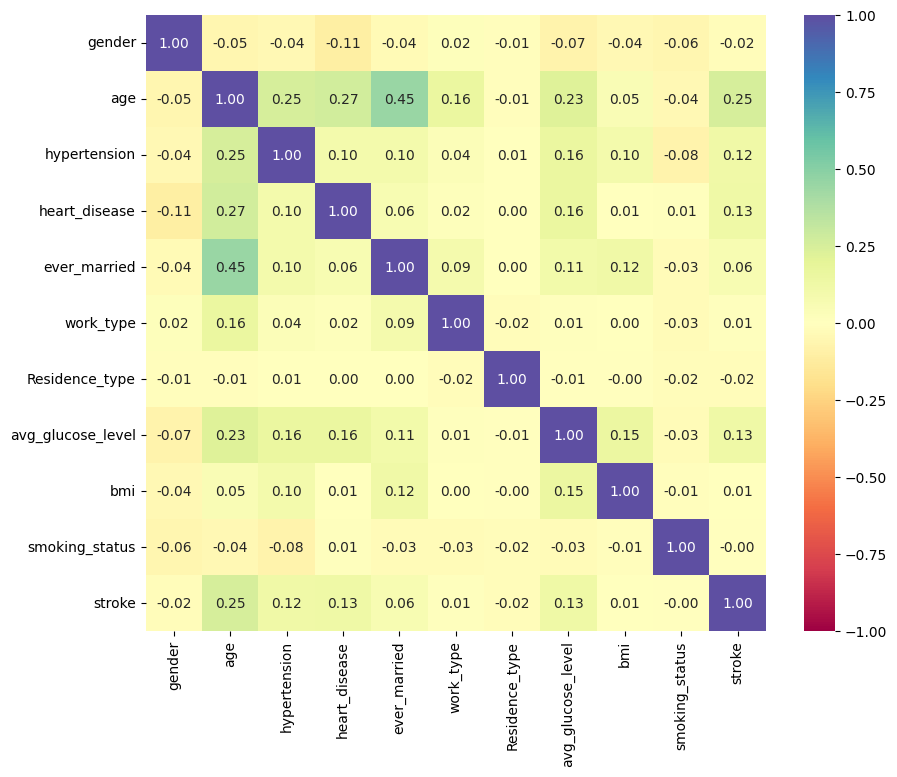

In [34]:
fig, (axes) = plt.subplots(1,1, figsize=(10,8))
sns.heatmap(stroke_data.corr(), cmap='Spectral', annot=True, fmt='.2f', center=0, vmin=-1, vmax=1)
plt.show()

Chi-square statistical test and check which of the explanatory variables are most related to the goal.

In [35]:
X = stroke_data.drop('stroke', axis=1)
y = stroke_data.stroke

best_features= SelectKBest(score_func=chi2, k=4) 
fit= best_features.fit(X,y) 

stroke_scores= pd.DataFrame(fit.scores_)
stroke_columns= pd.DataFrame(X.columns)

features_scores= pd.concat([stroke_columns, stroke_scores], axis=1)                # Create a dataframe with the results
features_scores.columns= ['Features', 'Score']
features_scores.sort_values(by = 'Score')

,Features,Score
9,smoking_status,0.000070
8,bmi,0.266033
5,work_type,0.544497
6,Residence_type,0.607445
0,gender,0.769405
4,ever_married,3.482106
2,hypertension,53.326653
3,heart_disease,62.811097
7,avg_glucose_level,1443.038738
1,age,1692.680858


The most predictable variables for stroke prediction are age, mean blood glucose, presence of heart disease, and hypertension.

> #### **MODELING**

<u>Preparation of datasets for modeling.</u> <br>
We divide the dataset into an objective variable y (the explanatory variable) and a set of predictors X (the explanatory variables). We also take 80% of the values in the table as the training dataset and the remaining 30% as the test dataset. The target variable is the stroke column, while the predictors are the age, avg_glucose_level, heart_disease, and hypertension columns.

In [36]:
y = stroke_data.stroke                                                                                                      # Defining the objective variable y
X = stroke_data.drop(['stroke', 'ever_married', 'gender', 'Residence_type', 'work_type', 'bmi', 'smoking_status'], axis=1)  # Defining explanatory variables
sc = StandardScaler()
X = sc.fit_transform(X)

<u>Model selection.</u><br>
We check seven classifiers, they will be Support Vector Classifier, Logistic Regression, Gaussian Naive Bayes, Random Forest and Gradient Boost to find out which one is the best. We calculate the classification accuracy of a given set of classification models to determine which model works best with the stroke dataset.

In [37]:
models = []                                                                                                  # Creating a list of models to choose from
models.append(('SVC', SVC()))
models.append(('LR', LR()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40, stratify=y)      # Divided into test and training parts

In [39]:
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)


X_train:  (3344, 4)
X_test:  (836, 4)
y_train:  (3344,)
y_test:  (836,)


In [40]:
names = []
scores = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
    
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  SVC  0.941388
1   LR  0.941388
2   DT  0.891148
3  GNB  0.867225
4   RF  0.927033
5   GB  0.936603


In [41]:
names = []                                                                                                   # Cross validation
scores = []

for name, model in models:    
    kfold = KFold(n_splits=20, random_state=None, shuffle=False) 
    score = cross_val_score(model, X, y, cv=kfold, scoring='accuracy').mean()    
    names.append(name)
    scores.append(score)
    
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

  Name     Score
0  SVC  0.941148
1   LR  0.941148
2   DT  0.888038
3  GNB  0.863636
4   RF  0.922488
5   GB  0.938995


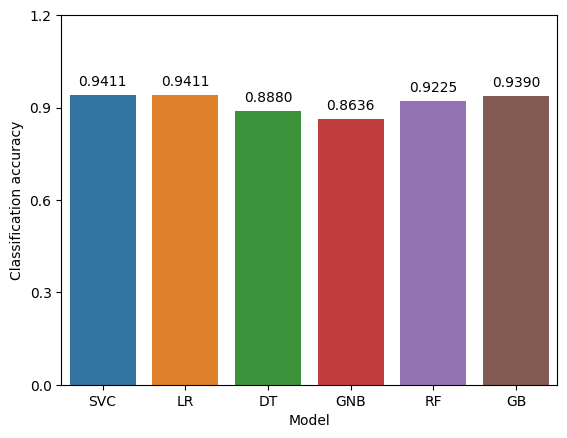

In [42]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)                                            # Compare the results using a barplot plot
axis.set(xlabel='Model', ylabel='Classification accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.03, '{:1.4f}'.format(height), ha="center") 
    axis.set_yticks([0,0.3,0.6,0.9,1.2])
plt.show()

<u>Result obtained.</u><br>
The best models turned out to be Support Vector Classifier and Logistic Regression with the result of classification accuracy equal to: 0.9411.

In [43]:
params = {'C': [0.001, 0.01, 0.1, 1.0],'penalty': ['l1', 'l2']}                    # Defining parameters

log_reg = LR(random_state=42, class_weight='balanced',solver='liblinear')          # Logistic regression model initialization

log_reg_cv = GridSearchCV(log_reg, param_grid=params, cv=5, scoring='accuracy')    # Initialize and use the best parameters for the model

log_reg_cv.fit(X_train, y_train)                                                   # Model training

y_pred = log_reg_cv.predict(X_test)                                                # Prediction
                                             

In [44]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))                          # Checking how well the model works

Accuracy: 0.9413875598086124


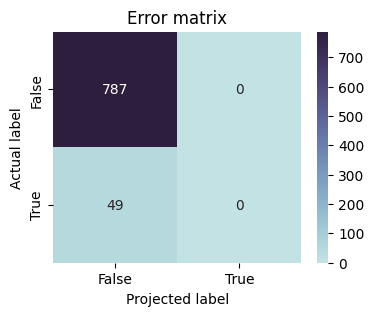

In [45]:
cf_matrix = confusion_matrix(y_test, y_pred)                                       # Creating a confusion matrix

fig, (axes) = plt.subplots(1,1, figsize=(4,3))                                     # Matrix presented graphically
color = sns.color_palette("ch:s=.35,rot=-.35", as_cmap=True)
ax = sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap=color)
ax.set_title('Error matrix');
ax.set_xlabel('Projected label')
ax.set_ylabel('Actual label');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [46]:
clf = svm.SVC(kernel='linear')                                                        # Initialize and train the SVC model
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

In [47]:
print("Accuracy:", metrics.accuracy_score(y_test, y_predict))                         # Checking how well the model works

Accuracy: 0.9413875598086124


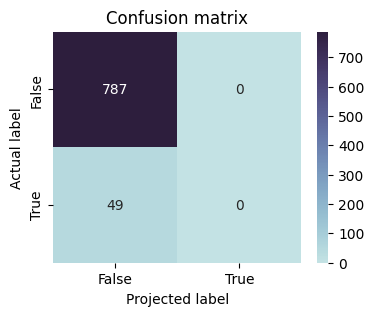

In [48]:
cf_matrix = confusion_matrix(y_test, y_predict)                                       # Creating a confusion matrix

fig, (axes) = plt.subplots(1,1, figsize=(4,3))                                        # Matrix presented graphically
color = sns.color_palette("ch:s=.35,rot=-.35", as_cmap=True)
ax = sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap=color)
ax.set_title('Confusion matrix');
ax.set_xlabel('Projected label')
ax.set_ylabel('Actual label');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

<u>Conclusions from the analysis</u> <br>
We isolated the most important parameters, namely age, avg_glucose_level, heart_disease, hypertension in predicting stroke. Both the application of the SVC model and the logistic regression brought the same results.